In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("data/Uber Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [26]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# About the dataset
### This dataset does not contain null values. The null values in the 'Driver id' column are equal to the number of statuses 'No Cars Available.' This is normal because there is no driver available for these trips. Additionally, the sum of null values in the 'Drop timestamp' column is equal to the number of statuses 'No Cars Available' and 'Cancelled.' This is also normal because these trips do not complete, and therefore, there is no drop point ('drop timestamp').

(-1.1259343281394145,
 1.1233140737657692,
 -1.1178230389955717,
 1.1008487161426463)

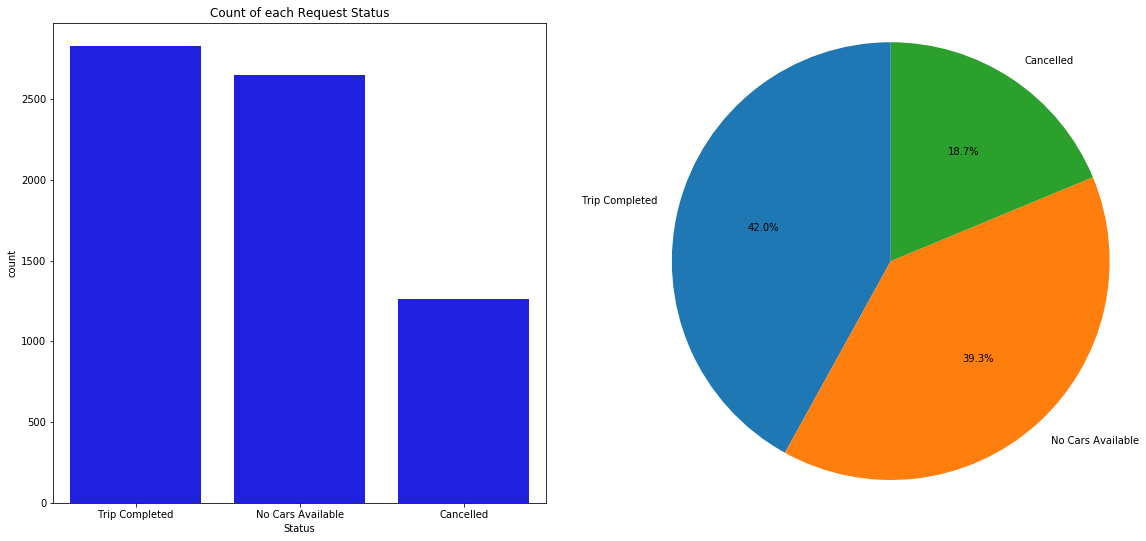

In [27]:
#Count of each Request Status
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
sns.countplot(x="Status", data=df,order = df['Status'].value_counts().index, color="b")
plt.title("Count of each Request Status")

plt.subplot(3,3,2)
labels = 'Trip Completed', 'No Cars Available', 'Cancelled'
sizes = df['Status'].value_counts()
explode = (0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 

### The above plot shows that the number of requests without available cars is large (2650). Additionally, there are 1264 requests that have been canceled. In other words, a total of 58% of the trips have failed either due to a cancellation or the unavailability of cars, and this is a significant percentage.

### We want to use this data to extract insights and increase the number of completed trips. Therefore, we should determine the times when users request cars for each pickup point. In other words, we need to identify the times when users cannot find cars, so we can focus on improving car services during these periods.

In [28]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

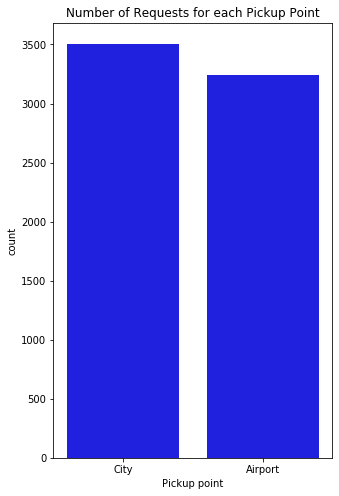

In [29]:
#number of Requests for each trip
df['Pickup point'].value_counts()
plt.figure(figsize=(5,8))
sns.countplot(x="Pickup point", data=df,order = df['Pickup point'].value_counts().index, color="b")
plt.title("Number of Requests for each Pickup Point")
plt.show()

#### The count plot above shows a small difference between the number of requests for the city compared to the airport, but we will delve deeper into this to identify the actual requests that our company should target and the corresponding times.

In [30]:
#converting the dtype of the date and time column from object dtype to datetime64
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [31]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


(-1.1063512061223881,
 1.1060724476788943,
 -1.1050485664587415,
 1.1002404079266068)

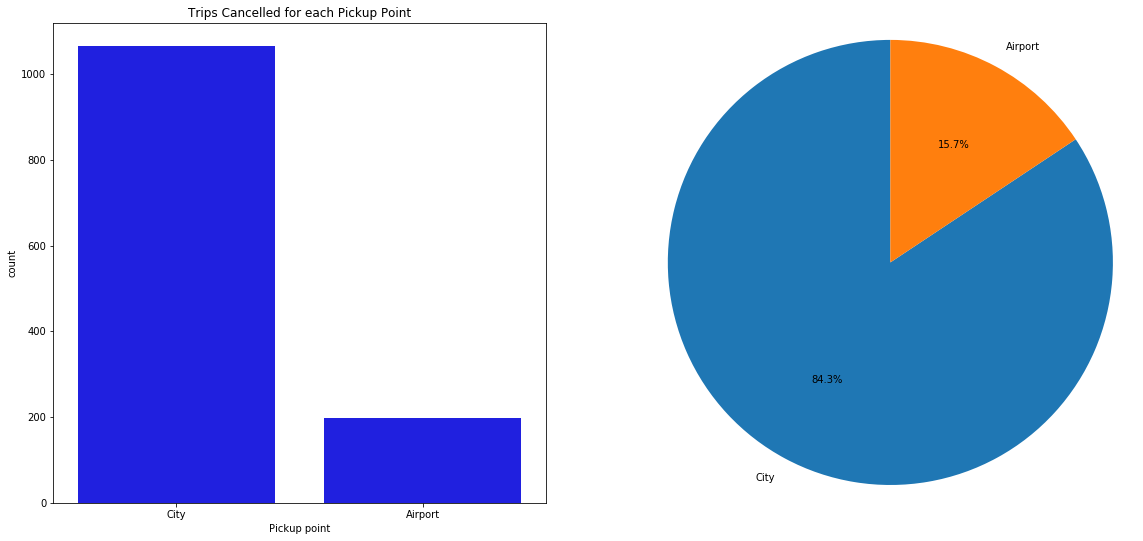

In [32]:
# Cancelled Trips 
df_c = df[(df["Status"] == "Cancelled")]
#plot
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
sns.countplot(x="Pickup point", data=df_c,order = df['Pickup point'].value_counts().index, color="b")
plt.title("Trips Cancelled for each Pickup Point")

plt.subplot(3,3,2)
labels = 'City', 'Airport'
sizes = df_c['Pickup point'].value_counts()
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
#plt.figure()

#### Most of the cancelled trips originate from the city point, accounting for 84.3% of all cancelled trips.

(-1.1079859694168688,
 1.1142126863541084,
 -1.1122446345808987,
 1.1005831143872526)

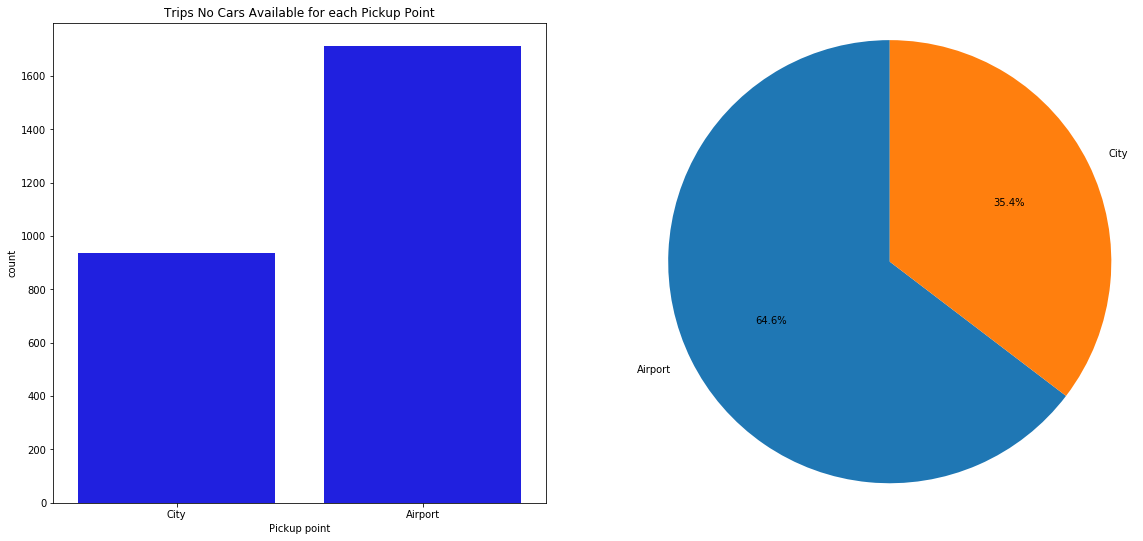

In [33]:
# No Cars Available Trips 
df_no_cars = df[(df["Status"] == "No Cars Available")]
#plot
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
sns.countplot(x="Pickup point", data=df_no_cars,order = df['Pickup point'].value_counts().index, color="b")
plt.title("Trips ""No Cars Available"" for each Pickup Point")

plt.subplot(3,3,2)
labels = 'Airport', 'City'
sizes = df_no_cars['Pickup point'].value_counts()
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

#### The count plot above shows that nearly 64% of trips with no available cars originate from the airport point, while the remaining 35% are from the city point.

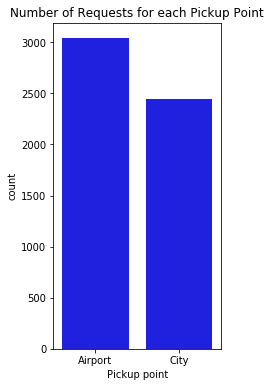

In [34]:
#number of Requests for each trip without the Cancelled Requests
df_nc= df[df['Status'] != ("Cancelled")]
plt.figure(figsize=(3,6))
sns.countplot(x="Pickup point", data=df_nc,order = df_nc['Pickup point'].value_counts().index, color="b")
plt.title("Number of Requests for each Pickup Point")
plt.show()

#### Now it's clear that the trips from the airport outnumber those from the city's point, and this is without considering the cancelled requests, which could have influenced our decisions.

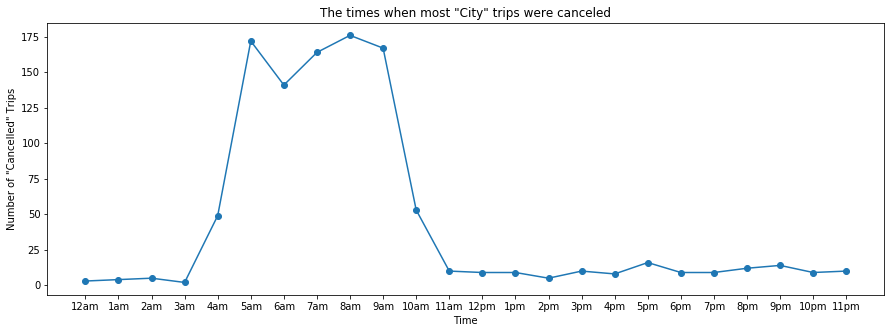

In [35]:
# The times when most "City" trips were canceled
df_cc = df_c[(df_c["Pickup point"] == "City")]
num = []
for i in range(0,24):
    x = df_cc[df_cc['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('The times when most "City" trips were canceled')
plt.xlabel('Time')
plt.ylabel('Number of "Cancelled" Trips')
plt.show()

### The plot above indicates that the majority of trip cancellations occur between 3 am and 10 am for the 'City' pickup point.

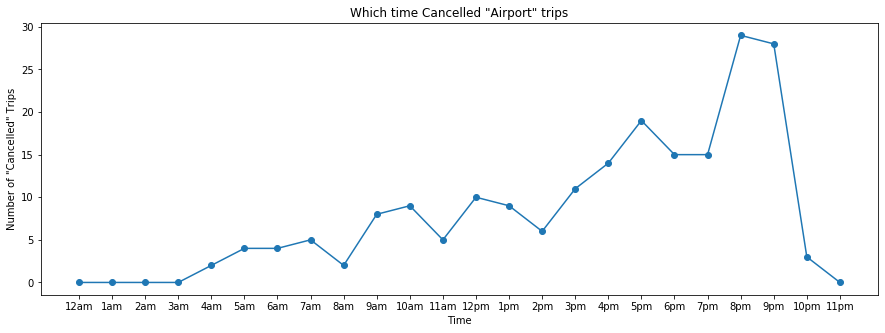

In [36]:
# The times when most "Airport" trips were canceled
df_ac = df_c[(df_c["Pickup point"] == "Airport")]
num = []
for i in range(0,24):
    x = df_ac[df_ac['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('Which time Cancelled "Airport" trips')
plt.xlabel('Time')
plt.ylabel('Number of "Cancelled" Trips')
plt.show()

### The plot above reveals that most trip cancellations for the 'Airport' pickup point occur from 3 pm to 10 pm. However, there are also fluctuations during other periods, such as between 8 am to 11 am and 11 am to 2 pm, where these periods exhibit smaller trends in the number of cancelled trips.

In [37]:
#Dropping some Error rows in the dataset
df.drop([1416,1997,927,1329,1375,1637,1669,2074,2266,2309,2790,75,390,578,911,960,1039,1088,1565,1615,1769,133,143,245,532,656,1526,1789,2120,2179,2439,2792],axis=0,inplace=True)

##### This rows have errors in the Requests timestamps and Drop timestamp it gives wrong calculations to the trip durations which results a negitive results and huge results due to the way it saved the dates in only these rows sothat i have to drop them.

## Applying statistical analysis to trip durations from each pickup point (City/Airport).

In [38]:
# City Duration
df_ccom = df[(df["Status"] == "Trip Completed") & (df["Pickup point"] == "City")]
df_ccom["trip_duration"] = (df_ccom['Drop timestamp'] - df_ccom['Request timestamp']).astype('timedelta64[m]')
df_ccom['trip_duration'].describe()

C:\Users\97158\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    1493.000000
mean       52.219022
std        13.852425
min        20.000000
25%        41.000000
50%        52.000000
75%        63.000000
max        83.000000
Name: trip_duration, dtype: float64

In [39]:
# Airport Duration
df_acom = df[(df["Status"] == "Trip Completed") & (df["Pickup point"] == "Airport")]
df_acom["trip_duration"] = (df_acom['Drop timestamp'] - df_acom['Request timestamp']).astype('timedelta64[m]')
df_acom['trip_duration'].describe()

C:\Users\97158\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    1306.000000
mean       51.928025
std        13.861527
min        21.000000
25%        41.000000
50%        51.000000
75%        64.000000
max        82.000000
Name: trip_duration, dtype: float64

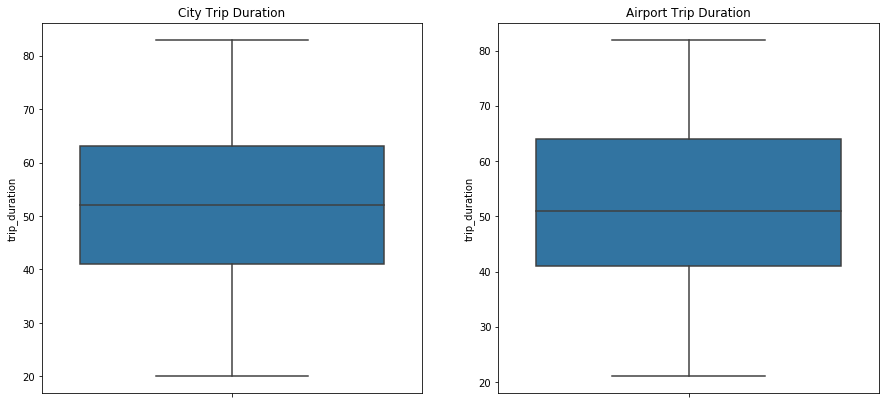

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
#plt.xlim(-10,90)
sns.boxplot(y="trip_duration",data=df_ccom)
plt.title("City Trip Duration")

plt.subplot(2,2,2)
#plt.ylim(-10,4000)
sns.boxplot(y="trip_duration",data=df_acom)
plt.title("Airport Trip Duration")
plt.show()

### In the box plots above, we observe that the median trip duration for both pickup points (City/Airport) is 52 and 51 minutes, respectively. The mean duration is nearly the same for both pickup points at 52 minutes. The box plots indicate that 50% of these completed trips are below 52 minutes for the City and below 51 minutes for the Airport.

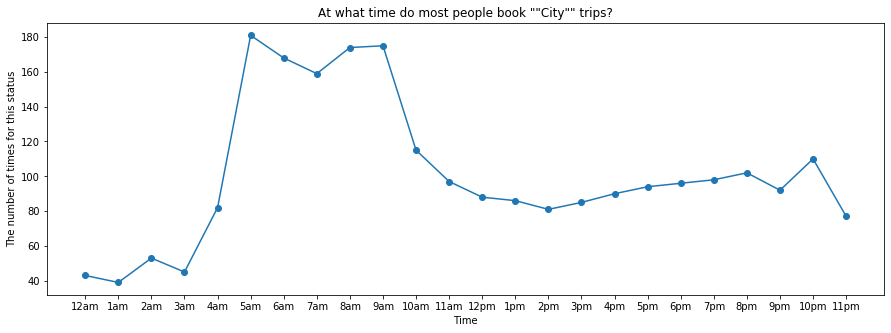

In [41]:
# At what time do most people book ""City"" trips?
df_ct = df[(df["Pickup point"] == "City") & (df['Status'] != "Cancelled")]
num = []
for i in range(0,24):
    x = df_ct[df_ct['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('At what time do most people book ""City"" trips?')
plt.xlabel('Time')
plt.ylabel('The number of times for this status')
plt.show()

#### The plot above shows that most 'City' requests from clients occur between 4 AM and 11 AM. After 11 AM, it remains nearly constant. NOTE THAT: These requests include both completed trips and requests that did not find a car available.

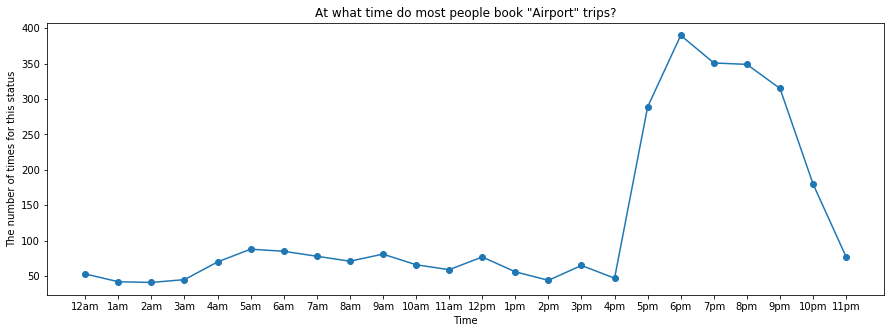

In [42]:
# At what time do most people book "Airport" trips?
df_at = df[(df["Pickup point"] == "Airport") & (df['Status'] != "Cancelled")]
num = []
for i in range(0,24):
    x = df_at[df_at['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('At what time do most people book "Airport" trips?')
plt.xlabel('Time')
plt.ylabel('The number of times for this status')
plt.show()

#### The plot above shows that the majority of 'Airport' requests from clients are between 5:00 pm and 10:00 pm. After 10 pm, it is going to decrease. NOTE THAT: These requests include both completed trips and requests that did not find a car available.

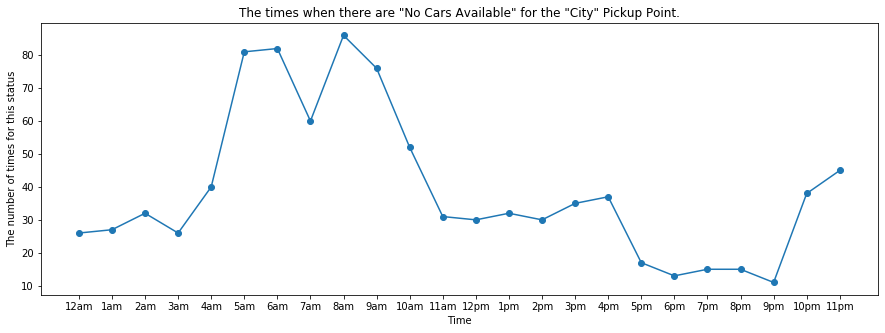

In [43]:
#Number of "No Cars Available" over Time for City Pickup Point"
df_cno = df[(df["Pickup point"] == "City") & (df["Status"] == "No Cars Available")]
num = []
for i in range(0,24):
    x = df_cno[df_cno['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('The times when there are "No Cars Available" for the "City" Pickup Point.')
plt.xlabel('Time')
plt.ylabel('The number of times for this status')
plt.show()

#### The plot above shows that the majority of 'City' requests, which did not find cars available for clients, occur between 4:00 am and 11:00 am. After 11 am, it remains nearly constant. It then experiences a slight increase from 3 pm to 4 pm, followed by a decrease. However, at 10 pm, there is a trend of increasing requests until 11 pm. NOTE THAT: These requests contain only instances where a car was not available.

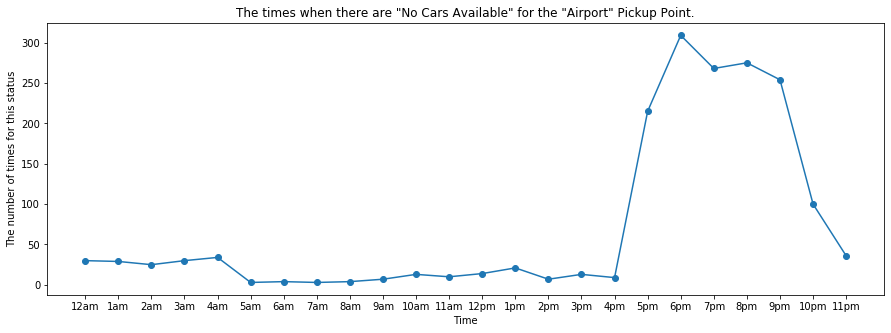

In [44]:
#Plot
#Number of "No Cars Available" over Time for Airport Pickup Point"
df_ano = df[(df["Pickup point"] == "Airport") & (df["Status"] == "No Cars Available")]
num = []
for i in range(0,24):
    x = df_ano[df_ano['Request timestamp'].dt.hour == i]
    b = x.Status.count()
    num.append(b)
plt.figure(figsize = (15,5))
axis_time = ["12am",'1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
plt.plot(axis_time,num,marker ='o')
plt.title('The times when there are "No Cars Available" for the "Airport" Pickup Point.')
plt.xlabel('Time')
plt.ylabel('The number of times for this status')
plt.show()

#### The plot above shows that the majority of 'Airport' requests, which did not find cars available for clients, occur between 5:00 pm and 10:00 pm. After 10 pm, it is going to decrease. NOTE THAT: These requests contain only instances where a car was not available.

# Conclusion

### To increase the number of trips and improve service for users, more drivers should be directed to the Airport pickup point during the period from 4:00 pm to 10:00 pm. This action would increase the number of completed trips by providing more cars during these peak times.

### Additionally, more drivers should be directed to the City pickup point during the following time periods: 3 am to 5 pm, specifically between 3 am and 11 am due to the need for drivers at this time, as our trend shows, and 9 pm to 11 pm.

## Note that:

### The company should direct more drivers to the Airport pickup point than to the City pickup point during peak times. This is due to the significant demand for the Airport Pickup point, as indicated in the above plots.

### Furthermore, we could not find a reason for the canceled trips, as the trip duration for both pickup points is normal. Therefore, we consider these canceled requests as potential data biases and have excluded them from our analysis to avoid influencing our decisions.